LAB 01: Getting Started
Trong bài thực hành này: 

1.   Làm quen với Keras 
    Keras được coi là một thư viện high-level với phần low-level (backend) trong môn học của chúng ta là TensorFlow. Keras cung cấp các API đơn giản, trực quan và tiện dụng hơn TensorFlow. Ngoài ra, keras còn cung cấp các lỗi rõ ràng, dễ dàng xử lý cũng như là có nhiều tài liệu và hướng dẫn.
2.   Thiết kế một mạng Convolutional Neural Network đơn giản với dataset MNIST






**Import thư viện**

In [ ]:
#import các thư viện 
import tensorflow as tf #thư viện tensorflow
import keras #Thư viện keras
import numpy as np #Thư viện numpy
import matplotlib.pyplot as plt #Thư viện matplotlib để vẽ đồ thị

In [ ]:
#Kiểm tra version của keras
keras.__version__

'2.4.3'

**Pre-processing**

Trước khi cho ảnh vào model chúng ta nên rescale vào đoạn [0,1] để giữ weights không quá lớn. 

validation sẽ được dùng như một tập dữ liệu để tune các thông số trên đó. Khi đã train xong trên tập validation, chúng ta sẽ tiến hành kiểm thử trên tập test

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Có 60000 ảnh dùng để train và valid, 10000 ảnh dùng để test
Mỗi ảnh có một kênh màu, kích thước 28x28

Ảnh đầu tiên của tập train
Label đầu tiên của tập train:  5


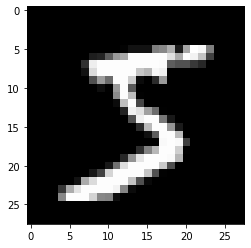

In [ ]:
# Tải dataset MNIST từ tensorflow
## MNIST là bài toán dự đoán một ảnh thể hiện ký tự số nào (dùng ảnh trắng đen)

## tải MNIST dataset từ keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
##resacle ảnh thành ảnh thực trong đoạn [0,1]
X_train, X_test = X_train/255.0, X_test/255.0

##in dataset
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print("Có 60000 ảnh dùng để train và valid, 10000 ảnh dùng để test")
print("Mỗi ảnh có một kênh màu, kích thước 28x28")
print()

## in thử ảnh một ảnh
print("Ảnh đầu tiên của tập train")
print("Label đầu tiên của tập train: ", y_train[0])
plt.imshow(X_train[0], cmap='gray')
plt.show()

#Tách một phần tập train thành tập valid
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1) # Tách theo tỉ lệ validation/train=1/9


**Sử dụng layer có sẵn của Keras**

Keras layer

Để tạo một keras layer, đầu tiên cần khởi tạo một layer, và sau đó xác định input cho layer đó

ví dụ để tạo một fully connected layer:

Khởi tạo layer:

dense_layer = Dense(units=10)

Xác định input layer:

dense_layer_output = dense_layer(input_layer)

với input_layer cũng là một layer của keras

Người ta thường viết gọn thành:

dense_layer_output = Dense(units=10)(input_layer)

#Model

In [ ]:
## Tạo layer input, mỗi data point có kích thước (28,28)
inputs = keras.layers.Input(shape=(28,28))
print("Kích thước input: {}, None tượng trưng cho số lượng ảnh một batch không xác định trước".format(inputs.shape))

## Reshape input
## do input vào lớp convolutional layer cần có 4 chiều, chiều cuối là số kênh,
## ảnh mnist là ảnh xám nên chỉ có một kênh
inputs_reshape = keras.layers.Reshape((28,28,1))(inputs)
print("Kích thước sau reshape: {}".format(inputs_reshape.shape))

## Tạo Convolutional Layer
### fileters: số lượng filter
### kernel_size: kích thước của filter
### strides: bước dịch của filter khi tính convolution
### padding: thêm số 0 hoặc không tính khi tính filter ở biên
    #### có 2 options: "same" là sẽ giữ nguyên kích thước ảnh sau khi qua lớp Convolution, "valid" kích thước ảnh sẽ đc tính đúng như công thức
### activation: hàm kích hoạt của lớp convolution
conv = keras.layers.Convolution2D(filters=20,
                                 kernel_size=[5,5],
                                 strides=[1,1],
                                 padding='same',
                                 activation=tf.nn.relu)(inputs_reshape)
print("Kích thước conv: {}, chiều cuối cùng chính là số filter".format(conv.shape))

## Maxpooling
### pool_size: kích thước pool để lấy max
### strides: bước dịch của pool 
maxpool = keras.layers.MaxPool2D(pool_size=[2,2],
                                strides=[2,2])(conv)
print("Kích thước sau maxpool: {}".format(maxpool.shape))

## Flatten lớp conv trước khi cho vào lớp dense, vì lớp dense yêu cầu input chỉ là vector
flatten = keras.layers.Flatten()(maxpool)
print("Kích thước flatten: {}".format(flatten.shape))

## Lớp Fully conntected với hàm kích hoạt softmax. units là số Node
    ### Lưu ý vì đây là lớp để classify nên hàm kích hoạt bắt buộc phải là softmax, 
softmax = keras.layers.Dense(units=10, activation='softmax')(flatten)


## Tạo model, với input là lớp inputs, outputs là lớp softmax
model = keras.models.Model(inputs=inputs, outputs=softmax)

## Compile model, 
    ### optimizer là thuật toán tối ưu ở đây dùng adam
    ### loss function là hàm mất mát ở đây dùng sparse_categorical_crossentropy
    ### metrics: để theo dõi các đánh giá trong quá trình huấn luyện. Đối với tập MNIST chúng ta dùng accuracy trên top1
model.compile(optimizer='adam',
             loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=["accuracy"])
    

## In toàn bộ cấu trúc của model
print("Cấu trúc của model: ")
model.summary()

Kích thước input: (None, 28, 28), None tượng trưng cho số lượng ảnh một batch không xác định trước
Kích thước sau reshape: (None, 28, 28, 1)
Kích thước conv: (None, 28, 28, 20), chiều cuối cùng chính là số filter
Kích thước sau maxpool: (None, 14, 14, 20)
Kích thước flatten: (None, 3920)
Cấu trúc của model: 
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
flatten 

#Training

In [ ]:
# Dùng hàm fit để bắt đầu train
## 2 tham số đầu là 2 numpy array, X_train là ảnh, y_train là label
## batch_size: kích thước của data batch
## epochs: số epoch tối đa muốn chạy
## validation data: model sẽ được đánh giá trên tập valid mỗi epoch
history=model.fit(X_train,y_train,
                  epochs=10,
                  batch_size=100,
                  validation_data=(X_valid,y_valid))

## Lưu model thành một file
model.save_weights("first_model.h5")


## Load model
model.load_weights("first_model.h5")

## Đánh giá model trên tập test
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Loss trên tập test: ", test_loss," Accuracy trên tập test: ", test_acc)

Epoch 1/10
540/540 [==============================] - 1s 3ms/step - loss: 0.3150 - accuracy: 0.9124 - val_loss: 0.1365 - val_accuracy: 0.9630
Epoch 2/10
540/540 [==============================] - 1s 2ms/step - loss: 0.1007 - accuracy: 0.9714 - val_loss: 0.0831 - val_accuracy: 0.9745
Epoch 3/10
540/540 [==============================] - 1s 2ms/step - loss: 0.0715 - accuracy: 0.9793 - val_loss: 0.0707 - val_accuracy: 0.9790
Epoch 4/10
540/540 [==============================] - 1s 2ms/step - loss: 0.0590 - accuracy: 0.9825 - val_loss: 0.0597 - val_accuracy: 0.9832
Epoch 5/10
540/540 [==============================] - 1s 2ms/step - loss: 0.0511 - accuracy: 0.9849 - val_loss: 0.0638 - val_accuracy: 0.9807
Epoch 6/10
540/540 [==============================] - 1s 2ms/step - loss: 0.0454 - accuracy: 0.9865 - val_loss: 0.0531 - val_accuracy: 0.9847
Epoch 7/10
540/540 [==============================] - 1s 2ms/step - loss: 0.0409 - accuracy: 0.9872 - val_loss: 0.0503 - val_accuracy: 0.9847
Epoch 

#Bài tập

1. Hãy tạo và huấn luyện một mạng no-ron theo cấu trúc sau trên tập MNIST (Tất cả các strides lớp Convolution dùng ở đây là [1,1])

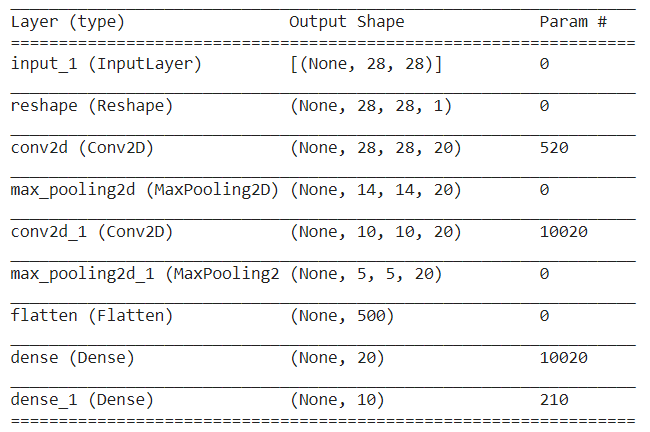

 2. Nêu cách tính các kết quả có trong Param # (Lưu ý Stride dùng ở đây đều là 1)

#Nộp Bài

*   Code và chạy kết quả lưu vào file notebook MHNC_TH1_MSSV.ipynb (notebook phải có kết quả chạy nếu ko xem như chưa làm)
*   Nén thành file MHNC_TH1_MSSV.rar (.zip) và nộp về: huynhthanh98vn@gmail.com
*   Deadline: 23g59 thứ 3 ngày 27/10/2020. Nộp trễ bị chia đôi số điểm.






